<h1 align='center'>EE2703 Applied Programming Lab</h1>
<h2 align='center'>Assignment 2</h2>
<h3 align='center'>Jan 18, 2018</h3>
<h3 align='center'>Rajat Vadiraj Dwaraknath EE16B033</h3>

## Part 1
The function is defined below:

In [1]:
# Importing numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Increase figure and font size
rcParams['figure.figsize'] = 12,9
rcParams['font.size'] = 15

In [3]:
def f(t):
    return 1/(1+t*t)

In [4]:
f(arange(10)) # Works with numpy arrays

array([ 1.        ,  0.5       ,  0.2       ,  0.1       ,  0.05882353,
        0.03846154,  0.02702703,  0.02      ,  0.01538462,  0.01219512])

## Part 2
A vector from **start** to **stop** with increments of size **step** is defined below:

In [5]:
start = 0
end = 5
step = 0.1
x = linspace(start,end,int(1+(end-start)/step))
x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ])

The function **f** is plotted using the vector defined above:

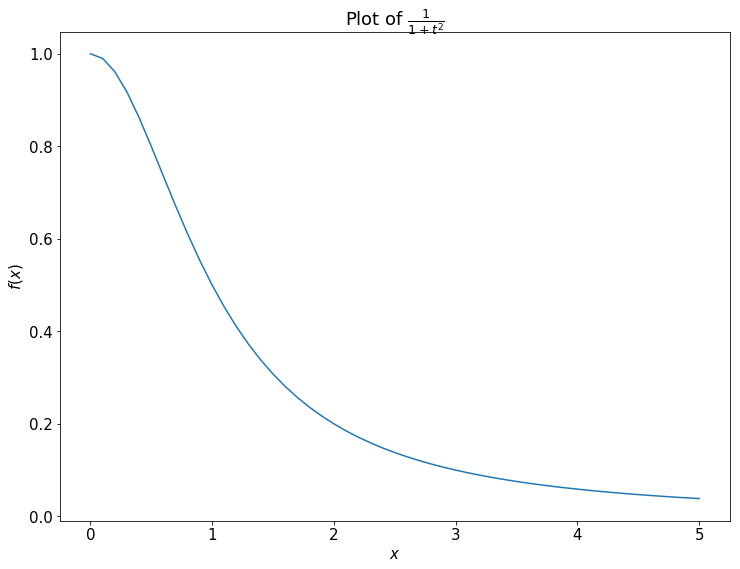

In [6]:
figure()
title(r"Plot of $\frac{1}{1+t^2}$")
plot(x,f(x))
xlabel("$x$")
ylabel("$f(x)$")
show()